#### Mutual Information 

The mutual information measures the reduction in uncertainty in variable A when variable B is known.

To select variables, we are interested in the mutual information between the predictor variables and the target. Higher mutual information values, indicate little uncertainty about the target Y given the predictor X.


Mutual information is a measure between two (possibly multi-dimensional) random variables $X$ and $Y$, that quantifies the amount of information obtained about one random variable, through the other random variable. The mutual information is given by

$ I(X; Y) = \int_X \int_Y p(x, y) \log \frac{p(x, y)}{p(x) p(y)} dx dy$


where $p(x,y)$ is the joint probability density function of $X$ and $Y$, and where $p(x)$ and $p(y)$ are the marginal density functions. The mutual information determines how similar the joint distribution $p(x,y)$ is to the products of the factored marginal distributions. If $X$ and $Y$ are completely unrelated (and therefore independent), then $p(x,y)$ would equal $p(x)p(y)$, and this integral would be zero.


When it comes to feature selection, we would like to maximise the mutual information between the subset of selected features $X_s$ and the target variable $y$

$\tilde{S} = \arg \max_S I(\textbf{X}_S; y), \quad\quad s.t. |S| = k,$


where $k$ is the number of features we want to select. This quantity is called the joint mutual information, and maximising this quantity is an NP-hard optimisation problem, because the set of possible combinations of features grows exponentially.

Scikit Learn has following methods:

- mutual_info_classif 
- mutual_info_regression 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile

**Classification**

In [2]:
data = pd.read_csv('../datasets/dataset_2.csv')
print(data.shape)
data.head()

(50000, 109)


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [3]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

**Determine Mutual Information**

Calculate the mutual information between the variables and the target. The smaller the value of the mi, the less information we can infer from the feature about the target

In [4]:
mi = mutual_info_classif(X_train, y_train)
mi

array([0.00000000e+00, 3.91853077e-03, 0.00000000e+00, 1.06988948e-03,
       3.46844426e-04, 5.01712427e-03, 4.98867845e-03, 2.93412347e-03,
       0.00000000e+00, 2.15720344e-04, 6.42839260e-04, 9.58465616e-04,
       8.26113559e-04, 4.85760911e-03, 0.00000000e+00, 1.38525233e-02,
       0.00000000e+00, 0.00000000e+00, 2.20715780e-04, 0.00000000e+00,
       3.97314147e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.54331806e-03, 1.50573185e-03, 0.00000000e+00, 0.00000000e+00,
       4.60946269e-03, 1.70132886e-02, 0.00000000e+00, 2.14343491e-03,
       3.99448217e-04, 1.94615250e-03, 4.92014165e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.04443362e-03,
       2.88108602e-03, 1.87277577e-03, 0.00000000e+00, 3.85716918e-03,
       0.00000000e+00, 4.61506793e-04, 0.00000000e+00, 2.59402570e-03,
       0.00000000e+00, 3.19880144e-03, 4.07560872e-02, 1.71804025e-03,
      

Here,

- Create a DF for each variable with mutual information.
- Add the variable names in the index. 
- Sort the features based on the their mutual information value.

Text(0, 0.5, 'Mutual Information')

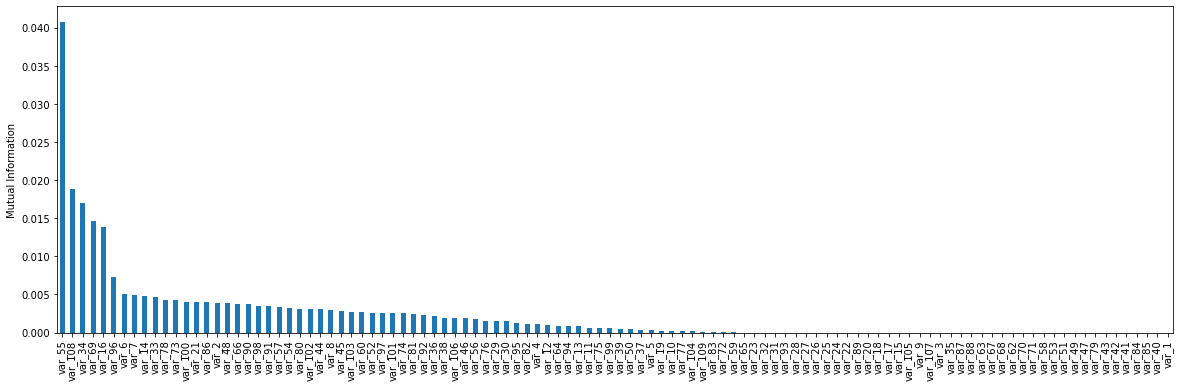

In [5]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

There are a few features (left of the plot) with higher mutual information values. There are also features with almost zero mutual information values on the right of the plot.

Once we find the mutual information values, to select features we need to determine a threshold, or cut-off value, above which a feature will be selected.

**There are a few ways in which this can be done:**

- Select top k features, where k is an arbitrary number of features

- Select features in the top n percentile, where n is again an arbitrary number

- Select all features above a certain threshold of MI, arbitrarily decided.

Scikit-learn transformer SelectKBest, allows us to automatically select the top k features, based of any statistical value, including the mutual information.

Sklearn's SelectPercentile allows us to select the features in the top percentile of any statistical value, including the mutual information.

Alternatively, if we want to select features based on a mutual information threshold, we can do it manually.

**Select top k features based on mutual information**

In [6]:
# here we will select the top 10 features
# based on their mutual information value

# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index(['var_6', 'var_7', 'var_14', 'var_16', 'var_33', 'var_34', 'var_55',
       'var_69', 'var_96', 'var_108'],
      dtype='object')

In [7]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [9]:
X_train.shape

(35000, 10)

#### Regression 

In [10]:
data = pd.read_csv('../datasets/houseprice.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [12]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [13]:
## fill missing values

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

**Determine Mutual Information**

Text(0, 0.5, 'Mutual Information')

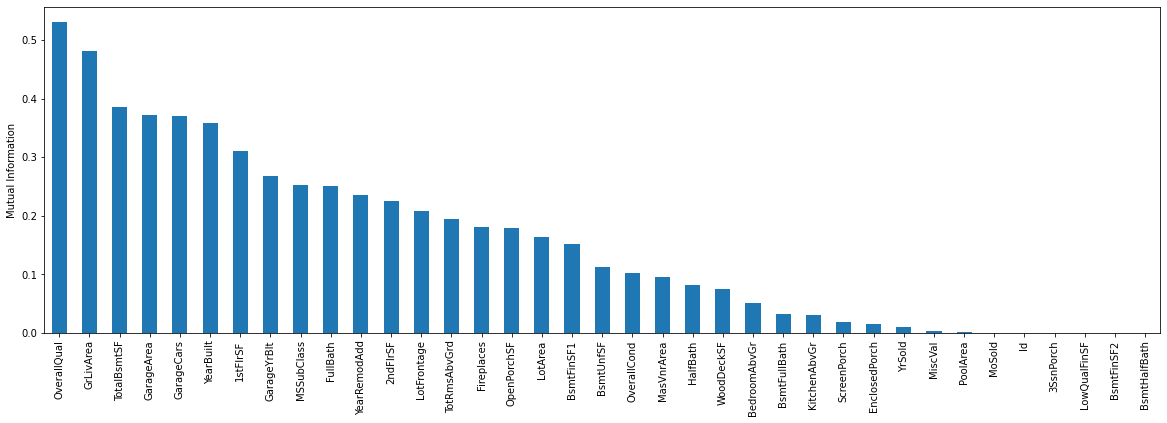

In [15]:
# determine the mutual information
mi = mutual_info_regression(X_train, y_train)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.ylabel('Mutual Information')

*Select top 10th percentile features*

In [16]:
# Select the features in the top percentile
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train, y_train)

# display the features
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')

In [17]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

X_train

array([[7.000e+00, 1.057e+03, 2.034e+03, 2.000e+00],
       [6.000e+00, 1.291e+03, 1.291e+03, 2.000e+00],
       [5.000e+00, 8.580e+02, 8.580e+02, 0.000e+00],
       ...,
       [6.000e+00, 0.000e+00, 1.902e+03, 2.000e+00],
       [7.000e+00, 1.374e+03, 1.557e+03, 2.000e+00],
       [7.000e+00, 1.195e+03, 1.839e+03, 2.000e+00]])